In [16]:
import math
def s(error):
    n=math.ceil((4/error - 3)/2)    #/a(n+1)/=1/(2n+3)
    Sum=0
    
    for i in range(n):
        Sum=Sum+(-1)**i*1/(2*i+1)*4
    return  n ,Sum

In [17]:
s(10**(-4))

(19999, 3.1416426560898874)

In [18]:
s(10**(-8))

(199999999, 3.1415926585894076)

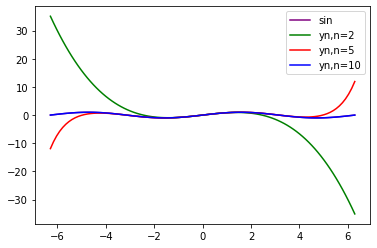

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt

def mysin(x, n):
    a = x
    s = a
    for i in range(1, n):
        a *= -1 * x**2 / ((2 * i) * (2 * i + 1))
        s += a
    return s
vmysin = np.vectorize(mysin, excluded=['order'])
x = np.linspace(-2*math.pi, 2*math.pi, 100)
y = np.sin(x)
y1=vmysin(x,2)
y2=vmysin(x,5)
y3=vmysin(x,10)
plt.plot(x, y,  label='sin', color='purple')
plt.plot(x, y1,  label='yn,n=2', color='green')
plt.plot(x, y2,  label='yn,n=5', color='red')
plt.plot(x, y3,  label='yn,n=10', color='blue')

plt.legend()
plt.show()

In [2]:
import numpy as np

a=np.array(([1,0.99],[0.99,0.98]))
b=np.linalg.inv(a)
b

array([[ -9800.,   9900.],
       [  9900., -10000.]])

In [18]:
def Jacobi(mx,mr,n,c):
    if len(mx) == len(mr):  #若mx和mr长度相等则开始迭代 否则方程无解
        x = [[1],[1],[1],[1]] #迭代初值 初始化为单行全0矩阵

        count = 0 #迭代次数计数
        while count < n:
            nx = [] #保存单次迭代后的值的集合
            for i in range(len(x)):
                nxi = mr[i][0]
                for j in range(len(mx[i])):
                    if j!=i:
                        nxi = nxi+(-mx[i][j])*x[j][0]
                nxi = nxi/mx[i][i]
                nx.append([nxi]) #迭代计算得到的下一个xi值
            lc = [] #存储两次迭代结果之间的误差的集合
            for i in range(len(x)):
                lc.append(abs(x[i][0]-nx[i][0]))
            if max(lc) < c:
                return nx #当误差满足要求时 返回计算结果
            x = [[round(i[0]+0.0001,3)] for i in nx]
            print(count,x)
            count = count + 1
        return False #若达到设定的迭代结果仍不满足精度要求 则方程无解
    else:
        return False
 
#调用 Jacobi(mx,mr,n=100,c=0.001) 示例
mx = [[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]]
 
mr = [[1],[0],[1],[0]]
print(Jacobi(mx,mr,100,0.001))

0 [[1.0], [1.0], [1.5], [0.5]]
1 [[1.0], [1.25], [1.25], [0.75]]
2 [[1.125], [1.125], [1.5], [0.625]]
3 [[1.063], [1.313], [1.375], [0.75]]
4 [[1.157], [1.219], [1.532], [0.688]]
5 [[1.11], [1.345], [1.454], [0.766]]
6 [[1.173], [1.282], [1.556], [0.727]]
7 [[1.141], [1.365], [1.505], [0.778]]
8 [[1.183], [1.323], [1.572], [0.753]]
9 [[1.162], [1.378], [1.538], [0.786]]
10 [[1.189], [1.35], [1.582], [0.769]]
11 [[1.175], [1.386], [1.56], [0.791]]
12 [[1.193], [1.368], [1.589], [0.78]]
13 [[1.184], [1.391], [1.574], [0.795]]
14 [[1.196], [1.379], [1.593], [0.787]]
15 [[1.19], [1.395], [1.583], [0.797]]
16 [[1.198], [1.387], [1.596], [0.792]]
17 [[1.194], [1.397], [1.59], [0.798]]
18 [[1.199], [1.392], [1.598], [0.795]]
19 [[1.196], [1.399], [1.594], [0.799]]
20 [[1.2], [1.395], [1.599], [0.797]]
21 [[1.198], [1.4], [1.596], [0.8]]
22 [[1.2], [1.397], [1.6], [0.798]]
23 [[1.199], [1.4], [1.598], [0.8]]
24 [[1.2], [1.399], [1.6], [0.799]]
25 [[1.2], [1.4], [1.599], [0.8]]
26 [[1.2], [1.4]

In [40]:
import numpy as np
D = np.diag([10,9,7,12,15])
L = np.array([[0,0,0,0,0],[-1,0,0,0,0],[-2,1,0,0,0],[-3,-2,-3,0,0],[-4,3,5,1,0]])
U = L.T
b=np.array([[12],[-27],[14],[-17],[12]])

In [43]:
#jacobi迭代
# R=np.linalg.inv(D)
# M=np.dot(R,L+U)
# g=np.dot(R,b)
# g.resize(5)

# 高斯赛德尔
R=np.linalg.inv(D-L)
M=np.dot(R,U)
g=np.dot(R,b)
g.resize(5)

# #SOR
# w=1.46
# R=np.linalg.inv(D-L)
# M=np.dot(R,(1-w)*D+w*U)
# M = np.round(M+0.0001,3)
# g=np.dot(R,w*b)
# g = np.round(g+0.0001,3)
# g.resize(4)



In [44]:
x = np.array([0,0,0,0,0])
for i in range(100):
    b=x
    x = np.dot(M,x.T)+g.T
    x = np.round(x+0.0001,3)#精确到三位有效数字
    print(i, x)
    if max(x-b)<0.001:
        break

0 [ 0.1   -0.234  0.366 -0.244  0.099]
1 [ 0.084 -0.104  0.564 -0.303  0.191]
2 [ 0.013 -0.03   0.686 -0.32   0.264]
3 [-0.043  0.018  0.768 -0.329  0.316]
4 [-0.083  0.051  0.825 -0.334  0.351]
5 [-0.11   0.073  0.863 -0.338  0.376]
6 [-0.128  0.088  0.891 -0.34   0.392]
7 [-0.141  0.098  0.908 -0.342  0.404]
8 [-0.15   0.106  0.921 -0.343  0.412]
9 [-0.156  0.111  0.93  -0.344  0.417]
10 [-0.16   0.114  0.935 -0.344  0.421]
11 [-0.163  0.116  0.939 -0.345  0.423]
12 [-0.165  0.118  0.942 -0.345  0.425]
13 [-0.166  0.119  0.944 -0.345  0.426]
14 [-0.167  0.12   0.945 -0.345  0.427]
15 [-0.168  0.12   0.946 -0.345  0.427]
16 [-0.168  0.12   0.946 -0.345  0.428]
17 [-0.168  0.121  0.947 -0.345  0.428]
18 [-0.169  0.121  0.947 -0.345  0.428]


In [45]:
def congrad(A,b,x):
    r = b - np.dot(A,x)
    d0 = r
    lam0 = np.dot(r.T,r)/np.dot(d0.T,np.dot(A,d0))
    for i in range(100):
        print(i,x)
        x = x + lam0*d0
        r = b - np.dot(A,x)
        beta = - np.dot(r.T,np.dot(A,d0))/np.dot(d0.T,np.dot(A,d0))
        d = r + beta*d0
        lam = np.dot(r.T,d)/np.dot(d.T,np.dot(A,d))
        qr = np.linalg.norm(b-np.dot(A,x))
        if qr <0.001:
            print(i+1,x)
            return x
        lam0 = lam
        d0 = d

In [46]:
A=D-L-U
# x = np.array([[0],[0],[0],[0],[0]])
x=np.array([0,0,0,0,0])
b=np.array([12,-27,14,-17,12])
x=congrad(A,b,x)

0 [0 0 0 0 0]
1 [ 1.07356007 -2.41551016  1.25248675 -1.52087676  1.07356007]
2 [ 1.30560481 -2.62798056  2.14663622 -1.69427042  0.44239319]
3 [ 1.44661808 -2.22538362  2.44804837 -1.97069065  0.62072181]
4 [ 1.08655012 -2.06357384  2.79291064 -2.10164499  0.83638627]
5 [ 1. -2.  3. -2.  1.]


In [10]:
import sympy as sp
a=sp.symbols('a')
m= sp.Matrix([[0,a,a],[a,0,a],[a,a,0]])
# m= sp.Matrix([[0,1/a,3/a],[1/a,0,2/a],[-3/a,2/a,0]])
lam = sp.symbols('lambda')
cp = sp.det(lam * sp.eye(3)-m)
eigs = sp.solveset(cp,lam)
eigs

FiniteSet(-a, 2*a)

In [57]:
w = 1.46
MR = (1-w)*D+w*U

In [56]:
ML = np.linalg.inv(D-w*L)

In [62]:
M = np.dot(ML,MR)

In [65]:
R = np.dot(ML, e)
R.resize(4)

# 4、数值实验1


In [47]:
def pmethod(A,x):   #直接幂法
    r=0
    for i in range(100000):
        y = x
        x = np.dot(A,y)
        nr = max(x)/max(y)
        if abs(nr - r)<0.000001:
            return i,r,x
        r = nr

        
import numpy as np
A = np.array([[6,-4,18],[20,-6,-6],[22,-22,11]])
x = np.array([1,1,1])
x = x.T
i,r,x = pmethod(A,x)
print(i,r,x)      

40 11.0 [1252730182 1252730182  626365091]


In [49]:
def pmethod(A,x):   #归一化
    r=0
    for i in range(1000000):
        m = np.argmax(abs(x))
        nr = x[m]
        y = x / nr
        x = np.dot(A,y)
        if abs(nr-r)<0.000001:
            return  i , r , x
        r = nr
    return i,r,x
        
import numpy as np
A = np.array([[6,-4,18],[20,-6,-6],[22,-22,11]])
x = np.array([1,1,1])
x = x.T
pmethod(A,x)

(999999, 19.25, array([15.71428571, 15.71428571, 25.14285714]))

# 4.2

In [37]:
def pmethod(A,x):  #幂法
    r = 0
    for i in range(3):
        m = np.argmax(abs(x))
        nr = x[m]
        y = x / nr
        x = np.dot(A,y)
        r = nr
    return r
        
        
def impmethod(A,x,r):  #反幂法
    r0 = 1
    I = np.identity(3)
    A = A - r*I
    for i in range(10**(4)):
        m = np.argmax(abs(x))
        nr = x[m]
        y = x / nr  
        x = np.dot(np.linalg.inv(A),y)
        if abs(r+1/nr-r0)<10**(-10):
            print(i)
            return x,nr
        r0 = r + 1/nr    
        
import numpy as np
A = np.array([[12,6,-6],[6,16,2],[-6,2,16]])
x = np.array([1,1,1])
r = pmethod(A,x)
r = np.round(r)   #取整
x,nr =impmethod(A,x,r)
print(nr,x)

13
0.6476668227207327 [ 0.64766682  0.55429426 -0.47592817]


In [28]:
r = sp.round(0.8)
r

AttributeError: module 'sympy' has no attribute 'round'

In [11]:
def pmethod(A,x):
    r = 0
    I = np.identity(3)
    for i in range(100):
        m = np.argmax(abs(x))
        nr = x[m]
        y = x / nr
        x = np.dot(A-9.6*I,y)
        if abs(nr-r)<0.01:
            return y , nr
        r = nr
        print(i,r,x)
        
import numpy as np

A = np.array([[1,2,3],[2,3,4],[3,4,5]])
x = np.array([1,0,0])
x = x.T
pmethod(A,x)

0 1 [-8.6  2.   3. ]
1 -8.6 [-10.11162791   2.13953488   3.6744186 ]
2 -10.111627906976745 [-10.11333947   1.94296228   3.82520699]


(array([ 1.        , -0.19211876, -0.37823382]), -10.113339466421342)

In [24]:
def impmethod(A,x):
    r = 0
    I = np.identity(3)
    for i in range(100):
        m = np.argmax(abs(x))
        nr = x[m]
        y = x / nr
        A = A - 1.2679*I
        x = A.solve(y)
        if abs(nr-r)<0.0001:
            return y , nr
        r = nr
        print(i,r,x)
        


import sympy as sp
A= sp.Matrix([[2,1,0],[1,3,1],[0,1,4]])

x=sp.Matrix([1,0,0])

impmethod(A,x)

0 1 Matrix([[12644.5990717792], [-9256.11098044955], [3387.91075745747]])
1 12644.5990717792 Matrix([[-0.788690276487147], [0.577419749858187], [-0.211368886248153]])
2 -0.788690276487147 Matrix([[-0.394326052892864], [0.288754098397141], [-0.105727127576906]])
3 -0.394326052892864 Matrix([[-0.262880790649906], [0.192535363439748], [-0.0705353840822966]])
4 -0.262880790649906 Matrix([[-0.197161367352776], [0.144418246372627], [-0.0529594997810316]])
5 -0.197161367352776 Matrix([[-0.157731478730068], [0.115536506169017], [-0.0424331699356111]])
6 -0.157731478730068 Matrix([[-0.131446071529674], [0.0962688244120321], [-0.0354342799182978]])
7 -0.131446071529674 Matrix([[-0.112671662151209], [0.0824921207702787], [-0.0304532875986414]])
8 -0.112671662151209 Matrix([[-0.0985915516740920], [0.0721450480399529], [-0.0267353591265749]])
9 -0.0985915516740920 Matrix([[-0.0876409272648494], [0.0640825377386732], [-0.0238610881442185]])
10 -0.0876409272648494 Matrix([[-0.0788809116657572], [0.05

(Matrix([
 [   0.97552363163733],
 [-0.0193937509546691],
 [                1.0]]),
 -0.0119754034193946)

In [ ]:
# y=sp.Matrix([1,0,0])
# z=L**(-1)*y
# x=U**(-1)*z

import sympy as sp
A= sp.Matrix([[2,1,0],[1,3,1],[0,1,4]])
I = np.identity(3)
A = A - 1.2679*I
L, U, _ = A.LUdecomposition()
print(L)
print(U)
b=sp.Matrix([1,0,0])

x = A.solve(b)

print(x)
print(A)

In [41]:

List=[[1,2,3],[4,3,1],[2,3,5]]
s=[1.00533,2.21223,3.12345]
s=np.array(s)
# x = [[round(i+0.0001,3)] for i in List] 

x=np.round(s+0.001,3)
x

array([1.006, 2.213, 3.124])

In [47]:
def dotA_x(x):
    x=np.matrix.tolist(x)  #将x变为列表
    x1=x[1::]+[0]    #当|i-j|=1时，A上三角矩阵 ✖ x后x的变化
    x2=[0]+x[:-1]   #|i-j|=1时，A下三角矩阵 ✖ x后x的变化
    x3=x[::-1]      #当 i+j=n+1，i!=n/2,i!=n+1 时A ✖ x 后x的变化
    x3[50000]=0
    x3[50001]=0
    Ax=3*np.array(x)-np.array(x1)-np.array(x2)+1/2*np.array(x3)
    return Ax
    
def congrad(b,x):
    x=np.array(x)
    r = b - dotA_x(x)
    d0 = r
    a0 = np.dot(r.T,r)/np.dot(d0.T,dotA_x(d0))
    for i in range(100):
        x = x + a0*d0
        r = b - dotA_x(x)
        beta = - np.dot(r.T,dotA_x(d0))/np.dot(d0.T,dotA_x(d0))
        d = r + beta*d0
        a = np.dot(r.T,d)/np.dot(d.T,dotA_x(d))
        qr = np.linalg.norm(dotA_x(x) - b)
        if qr <0.001:
            return x
        a0 = a
        d0 = d
        
import numpy as np
b=[2.5]+[1.5]*49998+[1]*2+[1.5]*49998+[2.5]
b=np.array(b)
x=[1]+[0]*99999
xn=congrad(b,x)
xn


array([1.00000817, 1.00000489, 1.00000523, ..., 0.99997759, 0.9999831 ,
       0.99998364])

In [39]:
A=[]
L=[]
U=[]
Y=[]
a=-2
b=5
c=-2          
T=[]
R=[]
Answer_X=[]
X=['i1','i2','i3','i4','i5','i6','i7','i8']
f=[220/27,0,0,0,0,0,0,0]
def agmA():
    for i in range(8):
        A.append([])
        for j in range(8):
            if i==j:
                if i==0:
                    A[i].append(2)
                else:
                    A[i].append(b)
            elif i+1==j:
                A[i].append(c)
            elif i==j+1:
                A[i].append(a)
            else:
                A[i].append(0)
def LU(a,b,c):
    R.append(2)
    for i in range(1,8):
        T.append(a/R[i-1])
        R.append(b-c*T[i-1])
def agmLU():
    LU(a,b,c)
    for i in range(8):
        L.append([])
        for j in range(8):
            if i==j:
                L[i].append(1)
            elif i==j+1:
                L[i].append(T[i-1])
            else:
                L[i].append(0)
    for i in range(8):
        U.append([])
        for j in range(8):
            if  i==j:
                U[i].append(R[i])
            elif i+1==j:
                U[i].append(c)
            else:
                U[i].append(0)
def CAL_Y():
    Y.append(f[0]/R[0])
    for i in range(7):
        y=(f[i+1]-c*Y[i])/R[i+1]
        Y.append(y)
def CAL_X():
    RE_X=[]
    RE_X.append(Y[7])
    for i in range(7):
        RE_X.append(Y[8-i-2]-T[8-i-2]*RE_X[i])
    for i in range(8):
        Answer_X.append(RE_X[8-i-1])
def print_Answer():
    print("运算结果为：")
    for i in range(8):
        print("{}={}".format(X[i], Answer_X[i]))
agmA()
agmLU()
CAL_Y()
CAL_X()
print_Answer()

运算结果为：
i1=8.147775166909105
i2=4.07370109283503
i3=2.0364775651784712
i4=1.0174928201111482
i5=0.5072544850993994
i6=0.2506433926373503
i7=0.11935399649397632
i8=0.04774159859759053


In [19]:
def agmA(n):
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j]=(1+0.1*(i+1))**(j+1-1)
    return A
def agmA1(n):
    A1=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A1[i,j]=1/(i+1+j+1-1)
    return A1
def agmb(A,n):
    b=np.zeros(n)
    for i in range(n):
        b[i]=sum(A[i])
    return b
def cond(A):
    w,c=np.linalg.eig(A)
    r1=max(abs(w))
    r2=min(abs(w))
    return np.sqrt(r1/r2)
        

In [21]:
import numpy as np
A1=agmA1(5)
A=agmA(5)
A1_1=agmA1(10)
A_1=agmA(10)
A1_2=agmA1(20)
A_2=agmA(20)
print(cond(A),cond(A1))
print(cond(A_1),cond(A1_1))
print(cond(A_2),cond(A1_2))

725.0942736310878 690.3674747862534
887003.6323121213 4003106.5601386833
1698904893.1389427 967971270.3424616


In [23]:
b1=agmb(A1,5)
b=agmb(A,5)
b1_1=agmb(A1_1,10)
b_1=agmb(A_1,10)
b1_2=agmb(A1_2,20)
b_2=agmb(A_2,20)
x1=np.dot(np.linalg.inv(A1),b1)
x=np.dot(np.linalg.inv(A),b)
x1_1=np.dot(np.linalg.inv(A1_1),b1_1)
x_1=np.dot(np.linalg.inv(A_1),b_1)
x1_2=np.dot(np.linalg.inv(A1_2),b1_2)
x_2=np.dot(np.linalg.inv(A_2),b_2)
print(x1)
print(x)
print(x1_1)
print(x_1)
print(x1_2)
print(x_2)

[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1.00025416 0.99783769 1.00554276 0.99494171 0.99884033 1.00354004
 0.99902344 1.         1.00012207 1.        ]
[0.99940687 1.00179005 0.99782562 1.00136948 0.99952698 1.00006866
 1.00000811 0.99999785 1.00000012 1.00000001]
[-4.41844418e+01  9.14417908e+02 -5.12249512e+03  1.77805469e+04
 -4.80970000e+04  9.22710000e+04 -1.12148000e+05  7.76320000e+04
 -1.88800000e+04 -1.55520000e+04  1.91520000e+04 -1.26400000e+04
  7.45600000e+03 -3.77600000e+03  1.05600000e+03  1.28000000e+02
 -1.44000000e+02  3.60000000e+01  8.00000000e+00 -4.00000000e+00]
[-4.29337088e+08  1.34901350e+09 -2.22485709e+09  2.54164992e+09
 -2.06477722e+09  1.18941286e+09 -4.76184576e+08  1.23502592e+08
 -1.59662080e+07 -1.20012800e+06  9.67680000e+05 -1.99680000e+05
  1.97120000e+04 -1.28000000e+02 -1.60000000e+02  1.20000000e+01
  4.00000000e+00  4.06250000e-01  1.05517578e+00  9.97924805e-01]


In [24]:
A2=np.zeros((10,10))
A2[1,1]=0.00000001
A2[9,9]=0.00000001
A1_1=A1_1+A2
A_1=A_1+A2
x1_1=np.dot(np.linalg.inv(A1_1),b1_1)
x_1=np.dot(np.linalg.inv(A_1),b_1)
print(x1_1)
print(x_1)


[ 1.00005769e+00  9.96392036e-01  1.06563872e+00  4.60956335e-01
  3.39072609e+00 -5.22031975e+00  1.07748375e+01 -8.12395859e+00
  5.65525007e+00  3.81469727e-04]
[1.01387662 0.9186492  1.21020317 0.68382645 1.30534363 0.80388927
 1.08368587 0.97712803 1.0036335  0.99974436]


# 5

In [80]:
def lagrange(xi,yi,x):
    L = sp.Matrix([0])
    for i in range(len(xi)):
        l = sp.Matrix([1])  
        for j in range(len(xi)):
            if i != j:
                l[0] = l[0] *(x - xi[j])/(xi[i] - xi[j])
        L[0] = L[0] + l[0]*yi[i]
    return L[0]


import sympy as sp
xi= sp.Matrix([1,1.1,1.2,1.3,1.4])
#x=sp.Matrix([1.25])
x=sp.Symbol('x')
yi=sp.Matrix([1,1.23368,1.55271,1.99372,2.61170])
L = lagrange(xi,yi,x)
sp.simplify(L)

7.65000000000146*x**4 - 29.0850000000137*x**3 + 44.6325000000215*x**2 - 30.6237500000061*x + 8.42625000000044

In [78]:
x=sp.Symbol('x')
y = sp.exp(x**2-1)
d = sp.diff(y,x,5)
#d.evalf(subs ={'x':1.25})
d

8*x*(4*x**4 + 20*x**2 + 15)*exp(x**2 - 1)

# 实验

In [1]:
def Newton(xi,yi,x):
    n = 10
    L = sp.zeros(1)
    L[0] =  yi[0]
    for j in range(1,n+1):
        l = sp.Matrix([1])
        fi = yi
        yi = sp.zeros(n-j+1,1)
        for i in range(j,n+1):
            yi[n-i] = (fi[n+1-i]-fi[n-i])/(xi[n+j-i]-xi[n-i])
        for k in range(j):
            l[0] = l[0]*(x-xi[k])
        L[0] = L[0] + l[0]*yi[0]
    return L[0]



In [2]:
import sympy as sp
xi = [i for i in range(-5,6)]  #取10个插值点
yi = [1/(1+4*x*x) for x in xi]  #计算对应的值
xi= sp.Matrix(xi)
x=sp.Symbol('x')
yi=sp.Matrix(yi)
L = Newton(xi,yi,x)
sp.simplify(L)

-4.95957630494614e-5*x**10 + 0.00274016590848274*x**8 + 8.67361737988404e-19*x**7 - 0.0514215070767196*x**6 + 0.392014985282312*x**4 - 1.38777878078145e-16*x**3 - 1.14328404835103*x**2 + 3.88578058618805e-16*x + 1.0

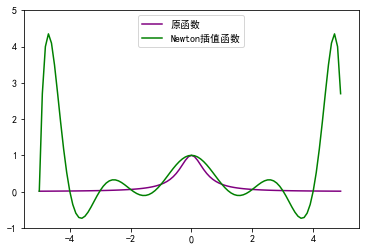

In [6]:
import numpy as np
import matplotlib.pyplot as plt
xi = [i/10 for i in range(-50,50)]  #取99个插值点
yi = [1/(1+4*x*x) for x in xi] 
L = sp.simplify(L)
l = [L.evalf(subs ={'x':i}) for i in xi]
l = np.array(l)
error = l - yi
plt.figure()    
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.axis([-5.5,5.5,-1,5])
plt.plot(xi, yi,  label='原函数', color='purple',linestyle="-")
plt.plot(xi, l,  label='Newton插值函数', color='green',linestyle="-")
plt.legend()
plt.show()

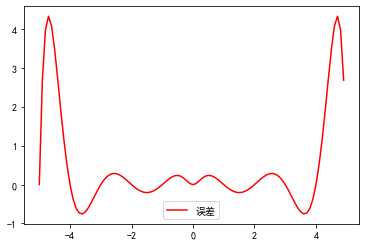

In [8]:
error = l - yi
plt.figure() 
plt.plot(xi,error,label='误差',color='red')
plt.legend()
plt.show()

ValueError: '*' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

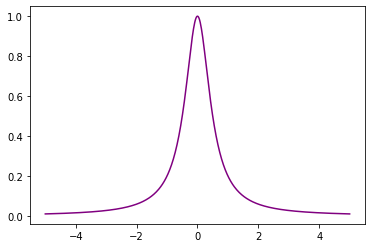

In [7]:
import matplotlib.pyplot as plt  
import numpy as np
x = np.linspace(-5, 5, 500)
xi = [i/10 for i in range(-50,50)]
y = 1/(1+4*x*x)
L = sp.simplify(L) #插值函数
l = [L.evalf(subs ={'x':i}) for i in xi]  #计算插值函数的纵坐标值
l = np.array(l)
plt.figure()    
plt.axis([-5.5,5.5,-1,5])
plt.plot(x, y,  label='原函数', color='purple',linestyle="-")
plt.plot(xi, l,  label='Newton插值函数', color='green',linestyle="-")
plt.legend()
plt.show()

D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25554 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\Lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\python\Lib\site-packages\matplotlib\bac

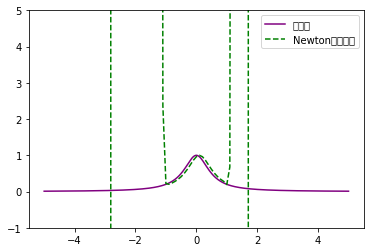

In [10]:
plt.figure()  
plt.axis([-5.5,5.5,-1,5])
plt.plot(x, y,  label='原函数', color='purple',linestyle="-")
plt.plot(xi, l,  label='Newton插值函数', color='green',linestyle="--")
plt.legend()
plt.show()

In [57]:
x = np.linspace(-5, 5, 100)
y = 1/(1+4*x*x)
L = sp.simplify(L) #插值函数
l = [L.evalf(subs ={'x':i}) for i in x]

In [59]:
y

array([0.00990099, 0.01030923, 0.01074316, 0.01120497, 0.01169709,
       0.01222221, 0.01278334, 0.01338384, 0.01402746, 0.0147184 ,
       0.0154614 , 0.01626179, 0.0171256 , 0.01805967, 0.01907177,
       0.02017078, 0.02136686, 0.0226717 , 0.02409879, 0.02566372,
       0.02738467, 0.02928285, 0.03138318, 0.03371505, 0.03631331,
       0.03921953, 0.04248356, 0.04616559, 0.05033872, 0.05509244,
       0.06053699, 0.06680936, 0.07408107, 0.08256881, 0.0925487 ,
       0.10437589, 0.11851126, 0.13555829, 0.1563133 , 0.18183336,
       0.21352476, 0.25324927, 0.30342714, 0.3670649 , 0.44751381,
       0.54751131, 0.66668934, 0.79676449, 0.91589571, 0.98990001,
       0.98990001, 0.91589571, 0.79676449, 0.66668934, 0.54751131,
       0.44751381, 0.3670649 , 0.30342714, 0.25324927, 0.21352476,
       0.18183336, 0.1563133 , 0.13555829, 0.11851126, 0.10437589,
       0.0925487 , 0.08256881, 0.07408107, 0.06680936, 0.06053699,
       0.05509244, 0.05033872, 0.04616559, 0.04248356, 0.03921

In [3]:
n = 3
xi= sp.Matrix([1.615,1.634,1.702,1.828])
#x=sp.Matrix([1.25])
x=sp.Symbol('x')
yi=sp.Matrix([2.4150,2.46259,2.65271,3.03035])
for j in range(1,n+1):
    fi = yi
    yi = sp.zeros(n-j+1,1)
    for i in range(j,n+1):
        yi[n-i] = (fi[n+1-i]-fi[n-i])/(xi[n+j-i]-xi[n-i])
    print(yi)



Matrix([[2.50473684210528], [2.79588235294117], [2.99714285714285]])
Matrix([[3.34650012455052], [1.03742527939012]])
Matrix([[-10.8407269725841]])


In [9]:
yi=sp.Matrix([1,1.23368,1.55271,1.99372,2.61170,3.49034])
L = sp.zeros(1)
L[0] = L[0] + yi[0]
L[0]

1

#差分


In [33]:
n = 4
xi= sp.Matrix([0,0.1,0.2,0.3,0.4])
xi= xi[::-1]
#x=sp.Matrix([1.25])
x=sp.Symbol('x')
yi=sp.Matrix([1,0.99500,0.98007,0.95534,0.92106])
yi=yi[::-1]
for j in range(1,n+1):
    fi = yi
    yi = sp.zeros(n-j+1,1)
    for i in range(j,n+1):
        yi[n-i] =-(fi[n-i]-fi[n+1-i])
    print(yi)


Matrix([[0.0342800000000000], [0.0247300000000000], [0.0149300000000000], [0.00500000000000000]])
Matrix([[-0.00954999999999995], [-0.00980000000000003], [-0.00992999999999999]])
Matrix([[-0.000250000000000083], [-0.000129999999999963]])
Matrix([[0.000120000000000120]])


In [35]:
def Newton(xi,yi,t):
    n = 4
    L = sp.zeros(1)
    L[0] =  yi[0]
    for j in range(1,n+1):
        l = sp.Matrix([1])
        fi = yi
        yi = sp.zeros(n-j+1,1)
        for i in range(j,n+1):
            #yi[n-i] = fi[n-i]-fi[n+1-i]
            yi[n-i] = -fi[n-i]+fi[n+1-i]
        for k in range(1,j+1):
            l[0] = l[0]*(t-k+1)/k
        L[0] = L[0] + l[0]*yi[0]
    return L[0]

        
import sympy as sp
xi= sp.Matrix([0.2,0.3,0.4,0.5,0.6])
#x=sp.Matrix([1.25])
t=sp.Symbol('t')
yi=sp.Matrix([0.98007,0.95534,0.92106,0.87758,0.82534])
L = Newton(xi[::-1],yi[::-1],0.25)
sp.simplify(L)

0.839193803710938

In [16]:
xi= sp.Matrix([0,0.1,0.2,0.3,0.4])
xi[::-1]

[0.400000000000000, 0.300000000000000, 0.200000000000000, 0.100000000000000, 0]

In [5]:
import sympy as sp
x=sp.Symbol('x')
y = 3*x*sp.exp(x) - sp.exp(2*x)
d = sp.diff(y,x,1)
y.evalf(subs ={'x':1})

0.765789386446486

In [12]:
l0 = -20*(x - 1.05)
l1 = 20*(x - 1)
d0 = sp.diff(l0,x,1)
d1 = sp.diff(l1,x,1)
xi=sp.Symbol('xi')
h0 = (1-2*d0*(x-1))*l0*l0
h1 = (1-2*d1*(x-1.05))*l1*l1
H0 = (x-1)*l0*l0
H1 = (x-1.05)*l1*l1

In [23]:
H = 0.7658*sp.expand(h0)+0.8354*sp.expand(h1)+1.5316*sp.expand(H0)+1.2422*sp.expand(H1)
sp.expand(H)

-4.08000000000038*x**3 + 9.65199999999959*x**2 - 5.53240000000369*x + 0.726200000000063

In [17]:
sp.expand(l0**2)

400.0*x**2 - 840.0*x + 441.0

In [25]:
l0 = (x*x-3*x+2)/2
l1 = -x*x+2*x
l2 = (x*x-x)/2
d0 = sp.diff(l0,x,1)
d1 = sp.diff(l1,x,1)
d2 = sp.diff(l2,x,1)
h0 = (1-2*d0*(x-0))*l0*l0
h1 = (1-2*d1*(x-1))*l1*l1
h2 = (1-2*d2*(x-2))*l2*l2
H1 = (x-1)*l1*l1
H2 = (x-2)*l2*l2

In [30]:
H = 1*sp.expand(h0)+2*sp.expand(h1)+1*sp.expand(h2)+0*sp.expand(H1)-1*sp.expand(H2)

In [31]:
sp.expand(H)

7*x**6 - 169*x**5/4 + 93*x**4 - 357*x**3/4 + 65*x**2/2 + 1

In [33]:
for i in range(-5,6):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [35]:
i = [i/10 for i in range(-50,50)]
i

[-5.0,
 -4.9,
 -4.8,
 -4.7,
 -4.6,
 -4.5,
 -4.4,
 -4.3,
 -4.2,
 -4.1,
 -4.0,
 -3.9,
 -3.8,
 -3.7,
 -3.6,
 -3.5,
 -3.4,
 -3.3,
 -3.2,
 -3.1,
 -3.0,
 -2.9,
 -2.8,
 -2.7,
 -2.6,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.1,
 -2.0,
 -1.9,
 -1.8,
 -1.7,
 -1.6,
 -1.5,
 -1.4,
 -1.3,
 -1.2,
 -1.1,
 -1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9]